# 🏀 NBA Draft 3-Point Shooting Analysis (1979–2024)

Whether you're a high school prospect deciding where to play, a basketball scout tracking sharpshooting talent, or just an NBA junkie who loves the deep ball — this notebook is for you.

This analysis explores the evolution and influence of 3-point shooting in the NBA Draft from 1979 (the year the 3-point line was introduced) through 2024. Over this 45-year period, we examine how well different college programs have developed long-range shooting talent — and just how much discrepancy exists between schools when it comes to producing elite NBA 3-point shooters.

🎯 Goals of the Analysis
We aim to answer key questions like:

🏫 Which colleges consistently produce elite 3-point shooters?
We’ll evaluate and rank schools based on their players' long-term NBA success in six core categories:

3PT Accuracy – Which schools' alumni had the highest career 3-point shooting percentages in the NBA?

Volume of Shooters – Which colleges produced the most players with meaningful 3-point shooting roles?

NBA Longevity – Which programs produced shooters with the longest careers (measured by total games played)?

Impact Score – Using a custom metric that blends Win Shares, BPM, and VORP per game to quantify a player's all-around impact.

Longevity + Accuracy Index – A custom score multiplying 3P% by total games played to highlight sustained 3-point excellence.

Consistency Across Metrics – Which schools repeatedly show up in multiple top 10 lists, proving they offer balanced 3-point development?

🧹 Methodology & Cleanup Process
To focus on college-produced talent:

❌ We exclude players drafted directly from high school (sorry, Kobe and LeBron).

❌ We exclude international players who didn’t attend NCAA programs (apologies to Jokić, Luka, and the like).

After this:

We define minimum benchmarks for 3P% and games played to ensure only meaningful samples are included.

We standardize names, remove duplicates, and clean incomplete records (especially around shooting stats).

We calculate custom metrics and visualize patterns using bar charts and performance-based rankings.

## 📦 Step 1: Import Libraries and Set Up Visualization Style

We begin by importing the core Python libraries used throughout this analysis:

- `pandas`: For reading, cleaning, and analyzing structured data (e.g., spreadsheets, tables)
- `numpy`: For numerical operations and handling missing or invalid values
- `matplotlib.pyplot`: For generating traditional data visualizations like scatter plots, bar charts, and line graphs
- `seaborn`: A high-level wrapper around Matplotlib that makes it easier to create beautiful, statistical visualizations

We also configure Seaborn with a white grid background and slightly increased font size for readability across all plots.


In [55]:
import numpy as np  # NumPy is used for numerical operations, particularly on arrays and handling missing or infinite values.
import pandas as pd  # Pandas provides powerful data structures like DataFrames for reading, cleaning, analyzing, and manipulating tabular data.
import os  # The os module allows interaction with the operating system, such as navigating directories and listing file contents.
import matplotlib.pyplot as plt  # Matplotlib is a core Python plotting library used to create static, interactive, and animated visualizations.
import seaborn as sns  # Seaborn is built on top of Matplotlib and provides a high-level interface for creating attractive and informative statistical graphics.


## 📂 Step 2: Load the NBA Draft Dataset (1976–2024)

In this step, we load the dataset containing NBA draft pick information using `pandas`.

- The dataset is stored in CSV format and contains detailed player-level data such as:
  - Player name
  - Draft year
  - College
  - Games played in the NBA
  - 3-point shooting percentage (`3P%`)
- We assign the file path and use `pd.read_csv()` to load it into a DataFrame called `df`.

Next, we’ll clean the dataset to focus only on players who had an actual NBA career. Specifically, we will:
❌ Filter out anyone drafted before 1979
❌ Exclude players who never played in the NBA
❌ Remove those drafted straight from high school or from overseas programs
⚙️ Apply additional filters to retain only players with meaningful career longevity and a minimum threshold for 3-point shooting

These steps ensure that our analysis reflects players who not clocked in considerable playing time in the NBA, but also contributed significantly on the court — especially in areas like scoring, efficiency, and sustained impact.

In [56]:
file_path = '/kaggle/input/nba-draft-picks-1947-present/NBA_Draft_ve.csv'

# Read the CSV file directly
df = pd.read_csv(file_path)

# Preview the data
df.head(10)


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Year,Rk,Tm,Player,College,Yrs,G,MP,PTS,TRB,...,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP
0,1947,1.0,PIT,Clifton McNeely,Texas Wesleyan University,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1947,2.0,TRH,Glen Selbo,Wisconsin,1,13.0,NaN,42.0,NaN,...,NaN,0.759,NaN,3.2,NaN,1.8,-0.2,NaN,NaN,NaN
2,1947,3.0,BOS,Bulbs Ehlers,Purdue,2,99.0,NaN,800.0,NaN,...,NaN,0.618,NaN,8.1,NaN,1.8,3.0,NaN,NaN,NaN
3,1947,4.0,PRO,Walt Dropo,UConn,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1947,5.0,NYK,Dick Holub,Long Island University,1,48.0,NaN,504.0,NaN,...,NaN,0.633,NaN,10.5,NaN,0.8,4.2,NaN,NaN,NaN
5,1947,6.0,PHW,Chink Crossin,Penn,3,147.0,NaN,694.0,NaN,...,NaN,0.711,NaN,4.7,NaN,1.5,3.7,NaN,NaN,NaN
6,1947,7.0,STB,Jack Underman,Ohio State,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1947,8.0,CHS,Paul Huston,Ohio State,1,46.0,NaN,164.0,NaN,...,NaN,0.697,NaN,3.6,NaN,0.6,1.2,NaN,NaN,NaN
8,1947,9.0,WSC,Dick O'Keefe,Santa Clara,4,172.0,NaN,888.0,37.0,...,NaN,0.640,NaN,5.2,2.2,0.9,1.7,NaN,NaN,NaN
9,1947,10.0,BLB,Larry Killick,University of Vermont,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 🧹 Step 3: Data Cleaning and Filtering

Before diving into analysis, we need to clean the dataset to ensure all records are relevant, valid, and consistent. Here's what we do in this step:

### ✅ Cleaning Actions:
- **Check/remove players with missing names** — these rows are incomplete.
- **Remove duplicate records** — based on a combination of `Player`, `Year`, and `College`.
- **Filter out pre-1979 data** — the 3-point line was introduced in the 1979–80 NBA season.
- **Ensure college data is properly formatted** — convert the `College` column to string.
- **Drop players who never played in the NBA** — based on `G` (games played); if `G` is missing or 0, we exclude the row.
- **Convert `3P%` to a numeric format** — so it can be used in mathematical operations and plots.
- **Replace infinite values with NaN** — avoids skewed or invalid stats during analysis.
- **Remove rows with missing 3P%** — we only want to analyze players who actually attempted 3-point shots and have valid stats.

After this step, the dataset is clean and ready for slicing by college, team, or country — and for calculating efficiency, volume, and performance trends.

In [57]:
df = df[df['Player'].notna()]
duplicate_count = df.duplicated(subset=['Player', 'Year', 'College']).sum()
print(f"Duplicate rows found: {duplicate_count}")
df = df[~df.duplicated(subset=['Player', 'Year', 'College'])]
df = df[df['Year'] >= 1979]
df['College'] = df['College'].astype(str)
df = df[df['G'].notna() & (df['G'] > 0)]
df['3P%'] = pd.to_numeric(df['3P%'], errors='coerce')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print("Missing values per column:")
print(df.isna().sum())
df = df[df['3P%'].notna()]

Duplicate rows found: 1
Missing values per column:
Year         0
Rk           0
Tm           0
Player       0
College      0
Yrs          0
G            0
MP           0
PTS          0
TRB          0
AST          0
FG%          5
3P%        212
FT%         58
MP.1         0
PTS.1        0
TRB.1        0
AST.1        0
WS           0
WS/48        1
BPM          1
VORP         0
dtype: int64


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


Now that we determined no issues in our dataset, we can continue.

## 🎓 Step 4: Filter for sample size

Our analysis focuses specifically on **college basketball programs**, so in this step we:

### 🎯 Filter Out Non-College Players
We remove:
- Players who were drafted directly from **high school**
- Players coming from **overseas** or **non-NCAA programs**
- Any draft pick with **no listed college**

These players are excluded to maintain a consistent comparison between NCAA institutions.

---

### 🧮 Group and Analyze College Shooters

Once we isolate college players:
- We **group them by `College`**
- For each school, we calculate:
  - 📈 **Average 3-Point Percentage** (`3P%`)
  - 🔢 **Number of qualifying shooters**
  - ⏱️ **Total NBA games played**
  - 🧮 **Average games per shooter**

To ensure statistical relevance:
- We only keep **colleges with at least 5 shooters**
- This avoids distortion from small sample sizes (e.g. schools with only 1 or 2 exceptional shooters)

This sets the foundation for identifying schools that consistently produce long-range shooters — both in **efficiency** and **volume**.

Afterwards, we'll see the contents of our sample size and determine next steps for further deep diving.


In [58]:
# --- Filter for College Players Only and Calculate Top 3P Schools ---

invalid_keywords = ['high school', 'none', 'overseas']
df_college = df[~df['College'].str.lower().str.contains('|'.join(invalid_keywords))]
df_college = df_college[df_college['College'].str.strip() != '']

# Group basic stats
college_stats = df_college.groupby('College').agg(
    Average_3P_Percentage=('3P%', 'mean'),
    Number_of_3P_Shooters=('Player', 'count')
).reset_index()

# Group advanced stats
college_productivity = df_college.groupby('College').agg(
    Average_3P_Percentage=('3P%', 'mean'),
    Number_of_Shooters=('Player', 'count'),
    Total_Games=('G', 'sum'),
    Avg_Games_Per_Shooter=('G', 'mean')
).reset_index()

# Filter: Only include colleges with at least 5 shooters
college_productivity = college_productivity[college_productivity['Number_of_Shooters'] >= 5]

# Filter df_college to only include players from valid colleges
df_college_sample = df_college[df_college['College'].isin(college_productivity['College'])]

# Show number of schools and players included after filtering
print(f"Total number of colleges with at least 5 qualifying shooters: {college_productivity.shape[0]}")
print(f"Total number of players from those colleges: {college_productivity['Number_of_Shooters'].sum()}")

# Calculate and display average playing time and 3P% in this sample
average_games_played = df_college_sample['G'].mean()
average_3p_percent = df_college_sample['3P%'].mean()

print(f"Average number of games played among this sample: {average_games_played:.2f}")
print(f"Average 3P% among this sample: {average_3p_percent:.3f}")

# Display highest and lowest 3P% in sample
max_3p = df_college_sample.loc[df_college_sample['3P%'].idxmax()]
min_3p = df_college_sample.loc[df_college_sample['3P%'].idxmin()]

print(f"Highest 3P%: {max_3p['Player']} ({max_3p['College']}) - {max_3p['3P%']:.3f}")
print(f"Lowest 3P%: {min_3p['Player']} ({min_3p['College']}) - {min_3p['3P%']:.3f}")

# Display highest and lowest games played in sample
max_games = df_college_sample.loc[df_college_sample['G'].idxmax()]
min_games = df_college_sample.loc[df_college_sample['G'].idxmin()]

print(f"Most games played: {max_games['Player']} ({max_games['College']}) - {max_games['G']} games")
print(f"Fewest games played: {min_games['Player']} ({min_games['College']}) - {min_games['G']} games")


Total number of colleges with at least 5 qualifying shooters: 102
Total number of players from those colleges: 1695
Average number of games played among this sample: 393.87
Average 3P% among this sample: 0.259
Highest 3P%: Greg Deane (Utah) - 1.000
Lowest 3P%: Bill Cartwright (San Francisco) - 0.000
Most games played: Vince Carter (UNC) - 1541.0 games
Fewest games played: Dwayne Polee (Pepperdine) - 1.0 games


From this data, we can see that we're working with a pretty skewed sample.  Greg Deane from Utah has a 100% 3 point average??  And Dwayne Polee from Pepperdine only played one game in the NBA!  We'll want to further refine these results to work with a much more refined list of players and colleges.  Let's drop players registering below average games played (sorry Dwayne Polee), followed by dropping below average 3 point shooters from that sample size.

We start by calculating average number of games played, and dropping below average players from the list:

In [59]:
# --- Filter out players below average games played ---

# Calculate average games played
avg_games_played = df_college['G'].mean()

# Filter players who played at least the average number of games
df_college_filtered = df_college[df_college['G'] >= avg_games_played]

# --- Regroup after filtering ---

college_productivity_filtered = df_college_filtered.groupby('College').agg(
    Average_3P_Percentage=('3P%', 'mean'),
    Number_of_Shooters=('Player', 'count'),
    Total_Games=('G', 'sum'),
    Avg_Games_Per_Shooter=('G', 'mean')
).reset_index()

# Filter: Only include colleges with at least 5 shooters
college_productivity_filtered = college_productivity_filtered[college_productivity_filtered['Number_of_Shooters'] >= 5]

# --- Print outputs ---
print(f"Average number of games played: {avg_games_played:.2f}")
print(f"Total number of players after filtering for playing time: {df_college_filtered.shape[0]}")
print(f"Total number of colleges after filtering for playing time: {college_productivity_filtered.shape[0]}")

# --- Print player with most and fewest games in this sample ---
most_games = df_college_filtered.loc[df_college_filtered['G'].idxmax()]
least_games = df_college_filtered.loc[df_college_filtered['G'].idxmin()]

print(f"Most games played: {most_games['Player']} ({most_games['College']}) - {most_games['G']} games")
print(f"Fewest games played: {least_games['Player']} ({least_games['College']}) - {least_games['G']} games")


Average number of games played: 386.67
Total number of players after filtering for playing time: 825
Total number of colleges after filtering for playing time: 56
Most games played: Vince Carter (UNC) - 1541.0 games
Fewest games played: Marc Jackson (Temple) - 387.0 games


Now we're on the right track.  Nearly half the 3 point shooters and colleges didn't make the cut in our list!  Now we can see Marc Jackson, who has above average playing time, is the lowest above average player in this list.  Next, let's further filter by determining what the average 3 point average is amongst this sample size, and dropping players that fall below this threshold.

In [60]:
# --- Calculate average 3P% among filtered players ---
avg_3p_percentage = df_college_filtered['3P%'].mean()

# --- Filter players with above-average 3P% ---
df_college_filtered = df_college_filtered[df_college_filtered['3P%'] >= avg_3p_percentage]

# --- Regroup by college after 3P% filter ---
college_productivity_final = df_college_filtered.groupby('College').agg(
    Average_3P_Percentage=('3P%', 'mean'),
    Number_of_Shooters=('Player', 'count'),
    Total_Games=('G', 'sum'),
    Avg_Games_Per_Shooter=('G', 'mean')
).reset_index()

# --- Filter: Only include colleges with at least 5 shooters ---
college_productivity_final = college_productivity_final[college_productivity_final['Number_of_Shooters'] >= 5]

# --- Print results ---
print(f"Average 3P% after games played filter: {avg_3p_percentage:.3f}")
print(f"Total number of players after filtering for 3P%: {df_college_filtered.shape[0]}")
print(f"Total number of colleges after filtering for 3P%: {college_productivity_final.shape[0]}")

# --- Print player with highest and lowest 3P% in this sample ---
highest_3p = df_college_filtered.loc[df_college_filtered['3P%'].idxmax()]
lowest_3p = df_college_filtered.loc[df_college_filtered['3P%'].idxmin()]

print(f"Highest 3P%: {highest_3p['Player']} ({highest_3p['College']}) - {highest_3p['3P%']:.3f}")
print(f"Lowest 3P%: {lowest_3p['Player']} ({lowest_3p['College']}) - {lowest_3p['3P%']:.3f}")


Average 3P% after games played filter: 0.277
Total number of players after filtering for 3P%: 534
Total number of colleges after filtering for 3P%: 43
Highest 3P%: Steve Kerr (Arizona) - 0.454
Lowest 3P%: Muggsy Bogues (Wake Forest) - 0.278


Wouldn't you know it!  Current coach Steve Kerr was the highest average 3 point draftee with above average longevity in the NBA, while little Muggsy was the lowest.  

Prior to filtering, our sample size contained:
* Total number of colleges: 102
* Total number of players: 1695

After applying our filters:
* Total number of colleges: 43
* Total number of players: 534

We now have a suitable sample size to work with, and are ready for our next step: determining which of these 43 colleges produce standouts by category.


## 🏅 Step 5: Top Ten 3-Point Percentage Colleges

In this step, we will rank our sample size by categories.

### 📊 What This Tells Us:
- This list highlights schools with the **most efficient 3-point shooters** on average.
- It focuses on **quality of shooting**, not just volume.
- Only colleges with a statistically meaningful sample size (≥ 5 shooters) are included to ensure fairness.

The table below displays:
- 🎓 **College name**
- 🎯 **Average 3P%** (across all qualifying draft picks from that school)
- 🔢 **Number of shooters**
- ⏱️ **Total NBA games** played by those shooters

This list helps identify potential lesser-known schools that consistently produce elite perimeter shooters, as well as major programs that combine shooting talent with sustained NBA impact.


In [61]:
# --- Get Top 10 Colleges by Average 3P% ---
top_10_colleges = college_productivity_final.sort_values(by='Average_3P_Percentage', ascending=False).head(10)

# --- Display the result ---
print("Top 10 Colleges by Average 3P%:")
print(top_10_colleges[['College', 'Average_3P_Percentage', 'Number_of_Shooters']])

Top 10 Colleges by Average 3P%:
            College  Average_3P_Percentage  Number_of_Shooters
122        Virginia               0.379600                   5
47       Iowa State               0.377000                   5
31             Duke               0.366429                  21
11   Boston College               0.366200                   5
46             Iowa               0.366000                   5
111            UCLA               0.364050                  20
121       Villanova               0.362200                  10
125      Washington               0.359833                   6
35          Florida               0.359333                   9
107           Texas               0.358800                  10


In [62]:
# --- Get Top 10 Colleges by Number of 3P Shooters ---
top_10_shooter_producers = college_productivity_final.sort_values(by='Number_of_Shooters', ascending=False).head(10)

# --- Display the result ---
print("Top 10 Colleges by Number of 3P Shooters:")
print(top_10_shooter_producers[['College', 'Number_of_Shooters', 'Average_3P_Percentage']])


Top 10 Colleges by Number of 3P Shooters:
          College  Number_of_Shooters  Average_3P_Percentage
52       Kentucky                  28               0.343643
113           UNC                  22               0.354591
31           Duke                  21               0.366429
111          UCLA                  20               0.364050
2         Arizona                  19               0.357053
50         Kansas                  14               0.356929
40   Georgia Tech                  12               0.348583
112         UConn                  11               0.356636
67       Michigan                  11               0.346636
107         Texas                  10               0.358800


In [63]:
# --- Get Top 10 Colleges by Total Games Played ---
top_10_by_games_played = college_productivity_final.sort_values(by='Total_Games', ascending=False).head(10)

# --- Display the result ---
print("Top 10 Colleges by Total NBA Games Played:")
print(top_10_by_games_played[['College', 'Total_Games', 'Number_of_Shooters']])


Top 10 Colleges by Total NBA Games Played:
          College  Total_Games  Number_of_Shooters
113           UNC      18507.0                  22
52       Kentucky      17857.0                  28
111          UCLA      16034.0                  20
31           Duke      14243.0                  21
2         Arizona      14127.0                  19
112         UConn       9732.0                  11
50         Kansas       9712.0                  14
40   Georgia Tech       9050.0                  12
67       Michigan       8051.0                  11
107         Texas       7524.0                  10


In [64]:
# Avoid division by zero
df_college_filtered = df_college_filtered[df_college_filtered['G'] > 0]

# Compute impact per game
df_college_filtered['Impact_per_Game'] = (
    df_college_filtered['WS'] + df_college_filtered['BPM'] + df_college_filtered['VORP']
) / df_college_filtered['G']

college_impact = df_college_filtered.groupby('College').agg(
    Number_of_Shooters=('Player', 'count'),
    Avg_Impact_per_Game=('Impact_per_Game', 'mean')
).reset_index()

# Optional: Only include colleges with enough shooters
college_impact = college_impact[college_impact['Number_of_Shooters'] >= 5]

# Sort to get top impact colleges
top_impact = college_impact.sort_values(by='Avg_Impact_per_Game', ascending=False).head(10)

# Display the results
print("Top 10 Colleges by Average Player Impact Per Game:")
print(top_impact[['College', 'Number_of_Shooters', 'Avg_Impact_per_Game']])


Top 10 Colleges by Average Player Impact Per Game:
            College  Number_of_Shooters  Avg_Impact_per_Game
19       California                   6             0.109958
60        Marquette                   6             0.103307
68   Michigan State                  10             0.094181
25         Colorado                   5             0.092985
124     Wake Forest                   9             0.088934
38       Georgetown                   5             0.088088
52         Kentucky                  28             0.085892
121       Villanova                  10             0.083595
81         Oklahoma                   7             0.081836
101      St. John's                   5             0.081695


In [65]:
# Step 1: Calculate Longevity + Accuracy Index per Player
df_college_filtered['Longevity_Accuracy_Index'] = df_college_filtered['3P%'] * df_college_filtered['G']

# Step 2: Group by College and Aggregate
college_combo_index = df_college_filtered.groupby('College').agg(
    Number_of_Shooters=('Player', 'count'),
    Average_Longevity_Accuracy_Index=('Longevity_Accuracy_Index', 'mean'),
    Average_3P_Percentage=('3P%', 'mean'),
    Total_Games=('G', 'sum')
).reset_index()

# Step 3: Filter for colleges with at least 5 shooters
college_combo_index = college_combo_index[college_combo_index['Number_of_Shooters'] >= 5]

# Step 4: Sort and show top 10
top_combo_index = college_combo_index.sort_values(by='Average_Longevity_Accuracy_Index', ascending=False).head(10)

# Step 5: Display the results
print("Top 10 Colleges by Longevity + Accuracy Combo Index:")
print(top_combo_index[['College', 'Average_Longevity_Accuracy_Index', 'Average_3P_Percentage',]])


Top 10 Colleges by Longevity + Accuracy Combo Index:
            College  Average_Longevity_Accuracy_Index  Average_3P_Percentage
112           UConn                        317.896364               0.356636
11   Boston College                        300.299600               0.366200
113             UNC                        298.682909               0.354591
101      St. John's                        297.504200               0.333400
35          Florida                        294.813444               0.359333
80       Ohio State                        289.969400               0.358600
111            UCLA                        289.238150               0.364050
0           Alabama                        284.141333               0.345167
19       California                        280.341167               0.341667
44         Illinois                        280.323750               0.348250


## 📊 Step 6: Visualize the Data
Now that we've ranked colleges and players across multiple performance metrics, it's time to bring the data to life.

In this step, we’ll create bar charts to visually compare results across the six categories we analyzed. Visualization helps uncover trends, patterns, and outliers that may not be obvious in raw tables. Specifically, we’re looking to:

🔎 Spot dominant programs that consistently appear across multiple categories

⚖️ Compare strengths and weaknesses of different colleges — e.g., high 3P% but low career longevity

📉 Identify discrepancies between volume and efficiency (some schools produce many shooters, but not always effective ones)

🧠 Highlight hidden gems — schools that rank high in impact or longevity despite a smaller number of shooters

By viewing each category side-by-side, we can better understand the landscape of 3-point shooting development in NCAA basketball and its impact on NBA careers.

Let’s dive into the visuals 👇

In [66]:
from collections import Counter

# Lists from your top 10 outputs
top_3p_percent = ['Virginia', 'Iowa State', 'Duke', 'Boston College', 'Iowa', 'UCLA', 'Villanova', 'Washington', 'Florida', 'Texas']
top_shooter_volume = ['Kentucky', 'UNC', 'Duke', 'UCLA', 'Arizona', 'Kansas', 'Georgia Tech', 'UConn', 'Michigan', 'Texas']
top_total_games = ['UNC', 'Kentucky', 'UCLA', 'Duke', 'Arizona', 'UConn', 'Kansas', 'Georgia Tech', 'Michigan', 'Texas']
top_impact_per_game = ['California', 'Marquette', 'Michigan State', 'Colorado', 'Wake Forest', 'Georgetown', 'Kentucky', 'Villanova', 'Oklahoma', "St. John's"]
top_combo_index = ['UConn', 'Boston College', 'UNC', "St. John's", 'Florida', 'Ohio State', 'UCLA', 'Alabama', 'California', 'Illinois']

# Combine all schools into a single list
all_top_schools = (
    top_3p_percent +
    top_shooter_volume +
    top_total_games +
    top_impact_per_game +
    top_combo_index
)

# Count frequency of each college
college_frequency = Counter(all_top_schools)

# Convert to sorted list of tuples
top_mentions = sorted(college_frequency.items(), key=lambda x: x[1], reverse=True)

# Display top 10 colleges by frequency
print("Top 10 Colleges Mentioned Across All Categories:")
for i, (college, count) in enumerate(top_mentions[:10], start=1):
    print(f"{i}. {college} — {count} mentions")


Top 10 Colleges Mentioned Across All Categories:
1. UCLA — 4 mentions
2. Duke — 3 mentions
3. Texas — 3 mentions
4. Kentucky — 3 mentions
5. UNC — 3 mentions
6. UConn — 3 mentions
7. Boston College — 2 mentions
8. Villanova — 2 mentions
9. Florida — 2 mentions
10. Arizona — 2 mentions


📌 Summary
Based on five distinct performance metrics — Average 3P%, Total NBA Games Played, Number of 3P Shooters, Impact Per Game, and a custom Longevity + Accuracy Combo Index — several schools consistently stand out for producing elite NBA 3-point shooters.

🏀 Key Takeaways:

* UConn ranked highly in both accuracy and longevity, showing strong overall value despite a smaller sample size.
* Texas and Arizona combined efficiency with sustained NBA careers, reinforcing their reputations as modern talent pipelines.
* Custom metrics like Impact Per Game and the Longevity + Accuracy Index provided deeper insight beyond raw shooting percentages, helping identify true high-value contributors.
* UCLA, Duke, Texas, Kentucky, UNC, and UConn frequently mentioned in all 5 categories.

Overall, while shooting percentage alone is informative, combining it with career longevity, volume, and on-court impact offers a much clearer picture of which colleges are true 3-point factories at the NBA level.

Now let's visualize these stats to see if we can identify large discrepencies in these categories.

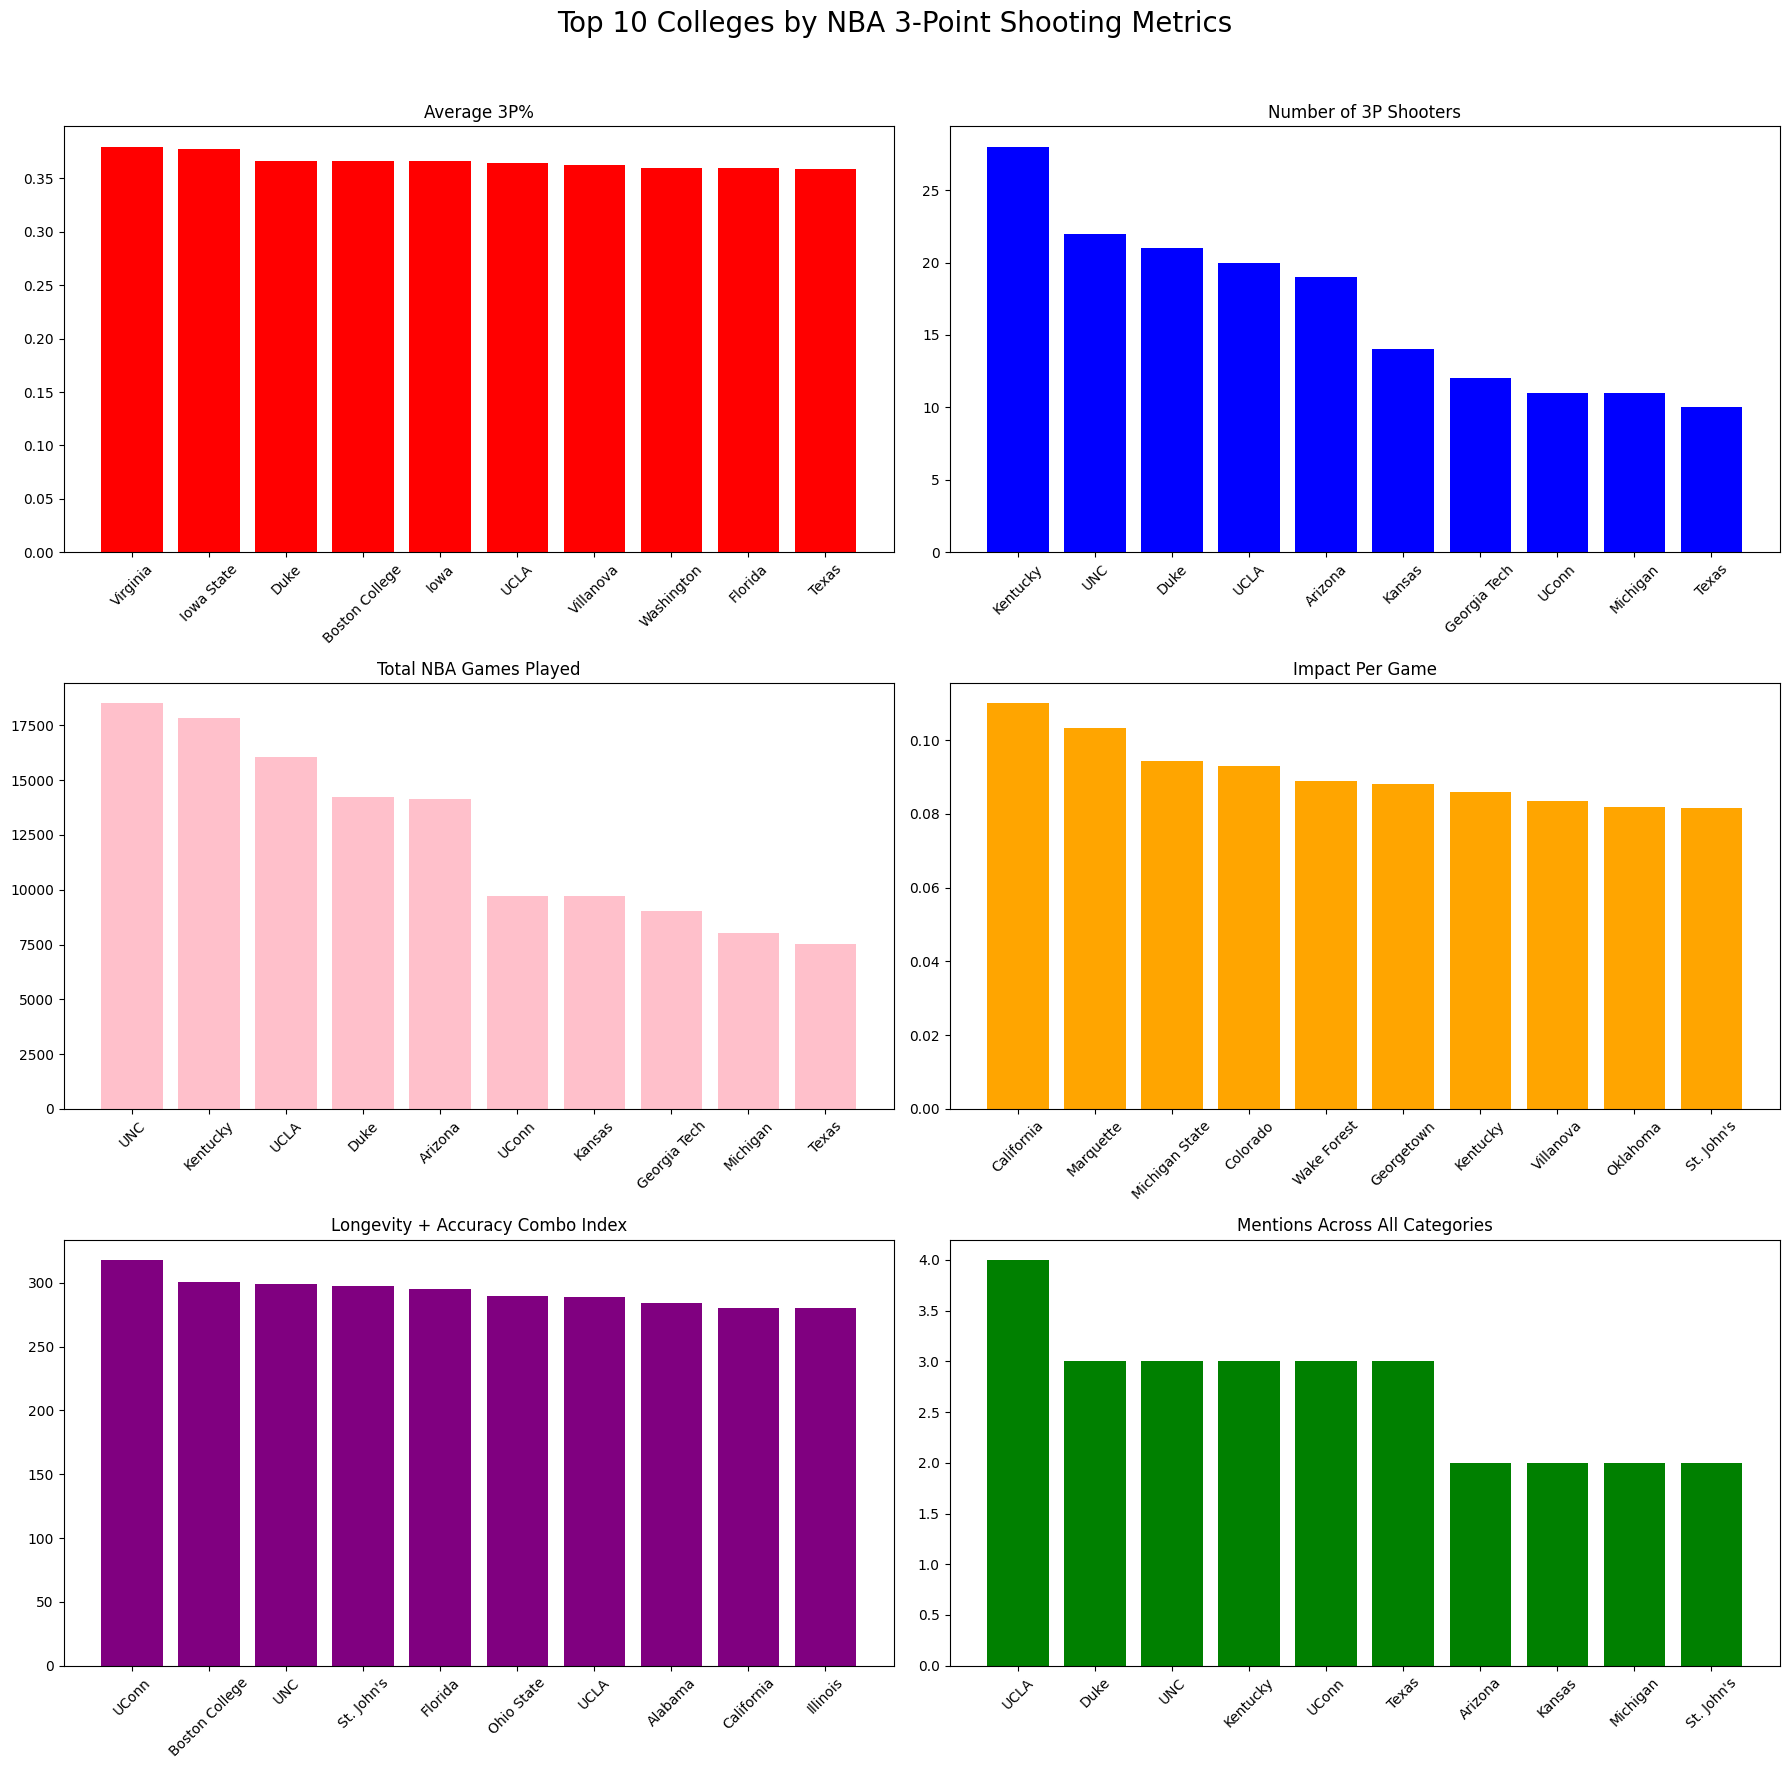

In [67]:
# 1. Top 10 by Average 3P%
top_3p = pd.DataFrame({
    'College': ['Virginia', 'Iowa State', 'Duke', 'Boston College', 'Iowa', 'UCLA', 'Villanova', 'Washington', 'Florida', 'Texas'],
    'Average_3P%': [0.3796, 0.377, 0.366429, 0.3662, 0.366, 0.36405, 0.3622, 0.359833, 0.359333, 0.3588]
})

# 2. Top 10 by Number of 3P Shooters
top_shooters = pd.DataFrame({
    'College': ['Kentucky', 'UNC', 'Duke', 'UCLA', 'Arizona', 'Kansas', 'Georgia Tech', 'UConn', 'Michigan', 'Texas'],
    'Number_of_Shooters': [28, 22, 21, 20, 19, 14, 12, 11, 11, 10]
})

# 3. Top 10 by Total Games Played
top_games = pd.DataFrame({
    'College': ['UNC', 'Kentucky', 'UCLA', 'Duke', 'Arizona', 'UConn', 'Kansas', 'Georgia Tech', 'Michigan', 'Texas'],
    'Total_Games': [18507, 17857, 16034, 14243, 14127, 9732, 9712, 9050, 8051, 7524]
})

# 4. Top 10 by Impact Per Game
top_impact = pd.DataFrame({
    'College': ['California', 'Marquette', 'Michigan State', 'Colorado', 'Wake Forest', 'Georgetown', 'Kentucky', 'Villanova', 'Oklahoma', "St. John's"],
    'Impact_per_Game': [0.109958, 0.103307, 0.094181, 0.092985, 0.088934, 0.088088, 0.085892, 0.083595, 0.081836, 0.081695]
})

# 5. Top 10 by Longevity + Accuracy Combo Index
top_combo = pd.DataFrame({
    'College': ['UConn', 'Boston College', 'UNC', "St. John's", 'Florida', 'Ohio State', 'UCLA', 'Alabama', 'California', 'Illinois'],
    'Longevity_Accuracy_Index': [317.896, 300.2996, 298.6829, 297.5042, 294.8134, 289.9694, 289.2381, 284.1413, 280.3411, 280.3238]
})

# 6. Top 10 Mentions
top_mentions = pd.DataFrame({
    'College': ['UCLA', 'Duke', 'UNC', 'Kentucky', 'UConn', 'Texas', 'Arizona', 'Kansas', 'Michigan', "St. John's"],
    'Mentions': [4, 3, 3, 3, 3, 3, 2, 2, 2, 2]
})

# Create 3x2 subplot grid
fig, axs = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle("Top 10 Colleges by NBA 3-Point Shooting Metrics", fontsize=20)

# Plot each chart
axs[0, 0].bar(top_3p['College'], top_3p['Average_3P%'], color='red')
axs[0, 0].set_title("Average 3P%")
axs[0, 0].tick_params(axis='x', rotation=45)

axs[0, 1].bar(top_shooters['College'], top_shooters['Number_of_Shooters'], color='blue')
axs[0, 1].set_title("Number of 3P Shooters")
axs[0, 1].tick_params(axis='x', rotation=45)

axs[1, 0].bar(top_games['College'], top_games['Total_Games'], color='pink')
axs[1, 0].set_title("Total NBA Games Played")
axs[1, 0].tick_params(axis='x', rotation=45)

axs[1, 1].bar(top_impact['College'], top_impact['Impact_per_Game'], color='orange')
axs[1, 1].set_title("Impact Per Game")
axs[1, 1].tick_params(axis='x', rotation=45)

axs[2, 0].bar(top_combo['College'], top_combo['Longevity_Accuracy_Index'], color='purple')
axs[2, 0].set_title("Longevity + Accuracy Combo Index")
axs[2, 0].tick_params(axis='x', rotation=45)

axs[2, 1].bar(top_mentions['College'], top_mentions['Mentions'], color='green')
axs[2, 1].set_title("Mentions Across All Categories")
axs[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# 📌 Conclusion
This analysis highlights key trends in identifying which colleges consistently produce high-performing NBA 3-point shooters. By visualizing six metrics — Average 3P%, Number of 3P Shooters, Total Games Played, Impact Per Game, Longevity + Accuracy Combo Index, and Mentions Across All Categories — we can draw the following insights:

### 🔴 Consistency in Accuracy and Longevity:
There is relatively little discrepancy between the colleges that rank highly in Average 3P% and those that score well in Longevity + Accuracy Combo Index. Schools like UCLA, Duke, Florida, and Boston College appear on both lists, indicating that some programs not only produce accurate shooters but also those with lasting careers.

### 🔵 Volume ≠ Efficiency or Impact: 
Colleges like Kentucky, UNC, and UCLA lead in Number of 3P Shooters and Total Games Played, but not all translate that into high Impact Per Game. This suggests some schools emphasize volume or NBA readiness, while others may focus more on skill specialization or opportunity.

### 🟠 High Variance in Impact Metrics: 
The Impact Per Game chart shows significant variability, with some less traditionally dominant programs (e.g., Marquette, Colorado, Wake Forest) outperforming blue-bloods in per-game contributions. This could reflect niche player roles, system fits, or undervalued prospects.

### 🟣 College Reputation Doesn’t Guarantee High Ranking Across Metrics:
While schools like Duke, UCLA, and UConn show up in multiple categories, others like Virginia, Iowa State, or California only appear in one — usually due to extreme performance in a specific area (e.g., elite 3P%, elite impact).

### 🟢 Top Mentions Reveal Overall Power Programs: 
Combining all rankings, UCLA, UNC, Duke, Kentucky, and UConn dominate in terms of overall presence across categories, confirming their reputations as all-around 3P talent pipelines.